In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import pandas as pd
from PIL import Image

# a)

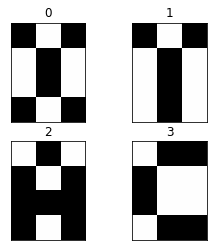

In [23]:
exemplars = np.array([
    [+1, -1, +1,
     -1, +1, -1,
     -1, +1, -1,
     +1, -1, +1,],
    [+1, -1, +1,
     -1, +1, -1,
     -1, +1, -1,
     -1, +1, -1,],
    [-1, +1, -1,
     +1, -1, +1,
     +1, +1, +1,
     +1, -1, +1,],
    [-1, +1, +1,
     +1, -1, -1,
     +1, -1, -1,
     -1, +1, +1,],
])

def draw(image):
    image = (image.reshape(4, 3) * -1 + 1) * 127
    img = Image.fromarray(image)
    plt.imshow(img)

plt.figure(figsize=(4, 4))
for i in range(len(exemplars)):
    plt.subplot(2, 2, i + 1)
    plt.gca().set_title(i)
    plt.xticks([])
    plt.yticks([])
    draw(exemplars[i])
plt.show()

In [21]:
def hamming_distance(a, b):
    return (a != b).sum()

for i in range(len(exemplars)):
    for j in range(len(exemplars)):
        print(f"HammingDistance({i}, {j}): {hamming_distance(exemplars[i], exemplars[j])}")

HammingDistance(0, 0): 0
HammingDistance(0, 1): 3
HammingDistance(0, 2): 8
HammingDistance(0, 3): 8
HammingDistance(1, 0): 3
HammingDistance(1, 1): 0
HammingDistance(1, 2): 11
HammingDistance(1, 3): 7
HammingDistance(2, 0): 8
HammingDistance(2, 1): 11
HammingDistance(2, 2): 0
HammingDistance(2, 3): 6
HammingDistance(3, 0): 8
HammingDistance(3, 1): 7
HammingDistance(3, 2): 6
HammingDistance(3, 3): 0


# b+c)

In [37]:
x_test = np.array(
    [+1, +1, +1,
     -1, +1, -1,
     -1, +1, -1,
     -1, +1, -1,],
)
idx_to_letter = {0: "X", 1: "Y", 2: "A", 3: "C"}

In [39]:
class MaxNet:
    def __init__(self, epsilon=0.15):
        self.epsilon = epsilon
    
    def f(self, x):
        return max(0, x)
    
    def max(self, x):
        a = np.array(x)
        while (a > 0).sum() > 1:
            a_old = a.copy()
            for i in range(len(a)):
                a[i] = self.f(a_old[i] - self.epsilon * np.sum(np.delete(a_old, i)))
        return np.argmax(a), x[np.argmax(a)]
    
class HammingNet:
    def __init__(self, exemplars):
        self.weights = exemplars / 2  # [4, 12]
        self.biases = np.ones(len(exemplars)) * len(exemplars[0]) / 2
        
    def best_match(self, x):
        y = self.weights @ x
        maxnet = MaxNet(epsilon=0.1)
        max_i, max_v = maxnet.max(y)
        return idx_to_letter[max_i]
        
        
hamming_net = HammingNet(exemplars)
hamming_net.best_match(x_test)

'Y'